# Project Introduction

# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

### Data Wrangling

#### Importing Python Packages

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import wilcoxon




#### Loading the datasets.

In [312]:
commune=pd.read_excel("commune.xlsx")
enroll = pd.read_csv("enroll.csv")
quest = pd.read_csv("quest.csv")
industry = pd.read_csv("industry.csv")
ord = pd.read_csv("ord.csv")
study_domain = pd.read_csv("study_domain.csv")
transaction = pd.read_csv("transaction.csv")
technology = pd.read_csv("technology.csv")

#### - Displaying informations about the dataset

In [313]:
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          250 non-null    int64 
 1   gender              250 non-null    object
 2   dob                 244 non-null    object
 3   commune             250 non-null    object
 4   created_at          250 non-null    object
 5   modified_at         250 non-null    object
 6   department          249 non-null    object
 7   education_level     250 non-null    object
 8   university          250 non-null    object
 9   study_domain        250 non-null    object
 10  current_employed    250 non-null    object
 11  formal_sector_job   250 non-null    object
 12  have_computer_home  250 non-null    object
 13  internet_at_home    250 non-null    object
 14  hear_AA_1           250 non-null    object
 15  after_AA            250 non-null    object
 16  quest_id            250 no

#### - Merging the questionnaire dataset and the Commune dataset

In [314]:
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

first_tab=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
first_tab.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01


#### -Creating a column for the applicants that paid to access the course .

In [315]:
transaction['Paid'] = 'Yes'
ord['Paid'] = 'Yes'

x = transaction.loc[:,['Paid','user_id','created_at']]
y = ord.loc[:,['Paid','user_id','created_at']]
trans_ord= pd.concat([x,y],axis=0)
trans_ord= trans_ord.rename(columns={'created_at': 'Payment_Date'})
trans_ord.head()

,Paid,user_id,Payment_Date
0,Yes,40976440,2021-03-08T05:08:50.832Z
1,Yes,41179271,2021-03-08T17:26:35.841Z
2,Yes,40973512,2021-03-08T18:52:09.147Z
3,Yes,41177453,2021-03-08T19:06:32.837Z
4,Yes,40797121,2021-03-08T22:10:00.796Z


#### - Merging the enroll dataset and transactions datasets

In [316]:
enroll.head()
enroll= enroll.rename(columns={'created_at': 'enroll_date'})
enroll['is_enroll'] = 'Yes'

scnd_tab=pd.merge(enroll,trans_ord, how = 'left',on = ['user_id'] )
scnd_tab= scnd_tab.loc[:,['user_id','quest_id','enroll_date','Paid','Payment_Date','is_enroll']]
scnd_tab



,user_id,quest_id,enroll_date,Paid,Payment_Date,is_enroll
0,29816173,NaN,2020-12-12T06:41:29.844Z,NaN,NaN,Yes
1,35229766,NaN,2020-12-13T14:41:17.720Z,NaN,NaN,Yes
2,31987560,NaN,2020-12-15T00:53:06.499Z,NaN,NaN,Yes
3,35616451,NaN,2020-12-18T18:38:55.683Z,NaN,NaN,Yes
4,35390649,NaN,2020-12-21T14:45:06.528Z,NaN,NaN,Yes
...,...,...,...,...,...,...
143,41508160,906b65e3-ce95-11eb-a294-7c67a234f601,2021-03-14T02:16:08.736Z,Yes,2021-03-14T02:16:08.983Z,Yes
144,41564742,906636cf-ce95-11eb-8679-7c67a234f601,2021-03-14T04:20:30.803Z,Yes,2021-03-14T04:20:23.483Z,Yes
145,41569249,906241d5-ce95-11eb-9850-7c67a234f601,2021-03-14T07:34:09.491Z,Yes,2021-03-14T07:34:09.638Z,Yes
146,41587952,906b3c86-ce95-11eb-b6a7-7c67a234f601,2021-03-14T15:34:39.800Z,Yes,2021-03-14T15:34:35.014Z,Yes


#### -Merging The modified quest dataset and the modified enroll dataset

In [317]:
third_tab=pd.merge(left=first_tab,right=scnd_tab, how = 'left', on=['quest_id'])
third_tab['is_enroll']= third_tab['is_enroll'].fillna('no')
third_tab['Paid']= third_tab['Paid'].fillna('no')
third_tab.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,user_id,enroll_date,Paid,Payment_Date,is_enroll
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,39726355.0,2021-02-14T23:15:19.500Z,no,NaN,Yes
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,40117659.0,2021-02-20T21:20:37.450Z,Yes,2021-03-03T23:00:11.974Z,Yes
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no


#### - Converting Quantitative variables into dummies. Using study domain and technology Dataset 

##### A- 

In [318]:
study_domain1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain1=study_domain1.groupby("quest_id").sum()
study_domain1
fourth_tab=pd.merge(left=third_tab,right=study_domain1, how = 'left', on=['quest_id'])
fourth_tab

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### B-

In [319]:
technologyy = pd.get_dummies(data=technology[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologyyy=technologyy.groupby("quest_id").sum()

fifth_tab=pd.merge(left=fourth_tab,right=technologyyy, how = 'left', on=['quest_id'])
fifth_tab



,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### - Dropping unecessary columns

In [320]:
columns_drop= ['Unnamed: 0','modified_at','current_employed','Commune_Id','Commune_FR','ADM1_PCODE','study_domain','department','university','commune']



#### - Creating our final dataset

In [321]:
final_tab= fifth_tab.drop(labels=None,columns=columns_drop, level=None, inplace=False)

In [322]:
y = pd.DataFrame(final_tab.created_at.str.split('T',1).tolist(),columns = ['Date_created_at','To_drop'])
final_tab['created_at'] = y.iloc[:,0]


### Transforming Data

#### A- Creating the Age columns 

In [323]:
final_tab['dob'] = final_tab['dob'].astype(str)
final_tab['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
final_tab['dob'] = pd.to_datetime(final_tab['dob'])
final_tab['created_at'] = pd.to_datetime(final_tab['created_at'])
final_tab['Age'] =final_tab['created_at'] - final_tab['dob']
final_tab['Age'] = final_tab['Age']//np.timedelta64(1,"Y")





In [324]:
drop_data = final_tab[(final_tab['Age'] == 1.0) | (final_tab['Age'] == 0) |(final_tab['Age'] == -1)]


In [325]:
final_tab.drop(index= drop_data.index, inplace= True)

In [326]:
final_tab[(final_tab['Age'] ==1) | (final_tab['Age'] ==0) |(final_tab['Age'] ==-1)]
drop_data['Age'].replace({(1,0,-1):final_tab['Age'].mean()},inplace = True)
drop_data = drop_data.reset_index()
drop_data = drop_data.drop(columns= 'index')
final_tab = pd.concat([final_tab,drop_data], axis = 0)
final_tab = final_tab.reset_index()
final_tab =final_tab.drop(columns= 'index')

C:\Users\valci\miniconda3\lib\site-packages\pandas\core\series.py:4506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [396]:
move = final_tab.pop('Age')
final_tab.insert(2,'Age',move)
final_tab['Age'] = final_tab['Age'].fillna(final_tab['Age'].mean())
final_tab['Age'] = final_tab['Age'].astype(float)
#final_tab = final_tab.drop(columns=['user_id','dob'],axis=1)
final_tab.Age.value_counts()

24.0    27
27.0    27
23.0    26
25.0    24
26.0    21
28.0    18
22.0    16
29.0    12
21.0    10
30.0     9
33.0     8
20.0     7
34.0     7
31.0     7
32.0     7
37.0     6
40.0     4
38.0     3
44.0     2
19.0     1
48.0     1
18.0     1
45.0     1
39.0     1
46.0     1
43.0     1
50.0     1
35.0     1
Name: Age, dtype: int64

#### - Removing the timestamp

In [328]:

date_list=['created_at','enroll_date','Payment_Date']
for i in lisst:
    final_tab[i] =final_tab[i].apply(lambda x : str(x).split("T")[0])
    final_tab[i] =final_tab[i].apply(lambda x : pd.to_datetime(x))



In [329]:
cols=final_tab.iloc[:,16:].columns
for i in cols:
    final_tab[i]= final_tab[i].fillna(0.0)
final_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  250 non-null    object        
 1   Age                     250 non-null    int32         
 2   created_at              250 non-null    datetime64[ns]
 3   education_level         250 non-null    object        
 4   formal_sector_job       250 non-null    object        
 5   have_computer_home      250 non-null    object        
 6   internet_at_home        250 non-null    object        
 7   hear_AA_1               250 non-null    object        
 8   after_AA                250 non-null    object        
 9   quest_id                250 non-null    object        
 10  Commune_en              248 non-null    object        
 11  Departement             248 non-null    object        
 12  enroll_date             102 non-null    datetime64

###  1. How many observations and variables are there in the dataset
 

In [330]:
# here your codes
final_tab.shape
print('The number of observations in the dataset is:',final_tab.shape[0])
print('The number of variables in the dataset is:',final_tab.shape[1])

The number of observations in the dataset is: 250
The number of variables in the dataset is: 37


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

### 2.A Calculate the average age of the observations

In [331]:
# here your codes
avg=final_tab['Age'].mean()
print('The average age of the observations in the whole dataset is', np.round(avg,2), 'years old')
avg_male=final_tab[final_tab['gender']== 'male'].Age.mean()
print('The average age of the observations for the male dataset is', np.round(avg_male,2), 'years old')
avg_female=final_tab[final_tab['gender']== 'female'].Age.mean()
print('The average age of the observations for the female dataset is', np.round(avg_female,2), 'years old','\n')



The average age of the observations in the whole dataset is 27.26 years old
The average age of the observations for the male dataset is 27.49 years old
The average age of the observations for the female dataset is 26.28 years old 



### 2.B Calculate variance of the whole datatset,male and female

In [332]:
var=final_tab['Age'].var()
print('The age variance of the observations in the whole dataset is', np.round(var,2))
var_male=final_tab[final_tab['gender']== 'male'].Age.var()
print('The age variance of the observations for the male is', np.round(var_male,2))
var_female=final_tab[final_tab['gender']== 'female'].Age.var()
print('The age variance  of the observations for the female is', np.round(var_female,2),'\n')



The age variance of the observations in the whole dataset is 29.75
The age variance of the observations for the male is 30.14
The age variance  of the observations for the female is 27.47 



### 2.B Calculate the kurtosis of the whole datatset,male and female

In [333]:
kurtosis=final_tab['Age'].kurtosis()
print('The kurtosis of the age distribution the whole dataset is', np.round(kurtosis,2))
kurtosis_male=final_tab[final_tab['gender']== 'male'].Age.kurtosis()
print('The kurtosis of the age distribution for the male is', np.round(kurtosis_male,2))
kurtosis_female=final_tab[final_tab['gender']== 'female'].Age.kurtosis()
print('The kurtosis of the age distributionfor the female is', np.round(kurtosis_female,2),'\n')



The kurtosis of the age distribution the whole dataset is 2.61
The kurtosis of the age distribution for the male is 2.47
The kurtosis of the age distributionfor the female is 4.28 



### 2.B Calculate the skewness of the whole datatset,male and female

In [334]:
skewness=final_tab['Age'].skew()
print('The skewness age of the distribution in the whole dataset is', np.round(skewness,2))
skewness_male=final_tab[final_tab['gender']== 'male'].Age.skew()
print('The skewness age of the distribution for the male is', np.round(skewness_male,2))
skewness_female=final_tab[final_tab['gender']== 'female'].Age.skew()
print('The skewness age of the distribution for the female is', np.round(skewness_female,2),'\n')

The skewness age of the distribution in the whole dataset is 1.46
The skewness age of the distribution for the male is 1.4
The skewness age of the distribution for the female is 1.88 



### 2.C Does the age distribution follow a normal distribution 

In [335]:
#Testing the distribution for normality
from scipy.stats import shapiro
statistic,pvalue=shapiro(final_tab['Age'])
alpha = 0.05
print('The Shapiro Wilk Test for the whole dataset')
print(pvalue)
if pvalue > alpha:
	print('ho Distribution follows a gaussian distribution (fail to reject H0)')
else:
	print('h1 Distribution doesnt follows a gaussian distribution  (reject H0)')



The Shapiro Wilk Test for the whole dataset
7.881387057741274e-13
h1 Distribution doesnt follows a gaussian distribution  (reject H0)


In [336]:
statistic,pvalue =shapiro(final_tab[final_tab['gender']== 'male'].Age)
print('The Shapiro Wilk Test for the male dataset')
print(pvalue)
if pvalue > alpha:
	print('ho Distribution follows a gaussian distribution (fail to reject H0)')
else:
	print('h1 Distribution doesnt follows a gaussian distribution  (reject H0)')

The Shapiro Wilk Test for the male dataset
8.864350919957076e-11
h1 Distribution doesnt follows a gaussian distribution  (reject H0)


In [337]:
statistic,pvalue =shapiro(final_tab[final_tab['gender']== 'female'].Age)
print('The Shapiro Wilk Test for the female dataset')
print(pvalue)
if pvalue > alpha:
	print('ho Distribution follows a gaussian distribution (fail to reject H0)')
else:
	print('h1 Distribution doesnt follows a gaussian distribution  (reject H0)')

The Shapiro Wilk Test for the female dataset
4.235836968291551e-06
h1 Distribution doesnt follows a gaussian distribution  (reject H0)


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

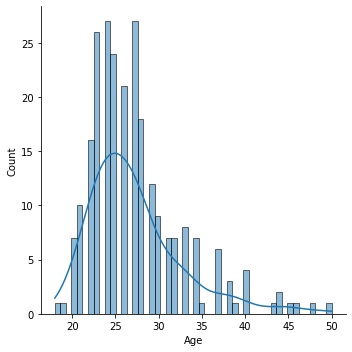

In [338]:
bins = 50
sns.displot(final_tab['Age'],bins = bins,kde = True)

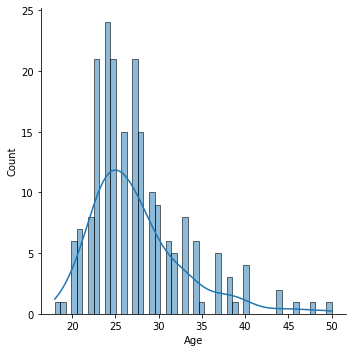

In [339]:
sns.displot(final_tab[final_tab['gender']== 'male'].Age, bins = bins,kde = True)

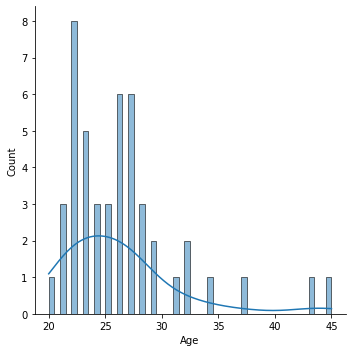

In [340]:
sns.displot(final_tab[final_tab['gender']== 'female'].Age,bins= bins,kde = True)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [341]:
#here your codes
# H0 : Mu = 24 
# H1 : Mu != 24

stat, p = wilcoxon(final_tab.Age - 24)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
	print('ho mu=24 (fail to reject H0)')
else:
	print('h1 mu!= 24 (reject H0)')

Statistics=4109.50, p=0.00
h1 mu!= 24 (reject H0)


#### No, We cannot say that 24 years can be considered as the average of the population likely to participate in this bootcamp. By realizing a Wilcoxon test , the p-value obtained (0.00) is lower than the significance level 0.05. The age difference of the population is different than 24 years old.

### 5. Calculate the average age of participants for each communication channel

In [342]:
#here your codes
display( final_tab['Age'].groupby(by= final_tab['hear_AA_1']).mean())

hear_AA_1
Ayiti Analytics Website    27.000000
Bootcamp Alumni            26.285714
ESIH                       25.111111
Facebook                   27.450000
Friend                     27.000000
Instagram                  24.400000
LinkedIn                   30.000000
WhatsApp                   27.772727
other                      28.444444
unknown                    22.000000
Name: Age, dtype: float64

### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Boxplot of applicants age by communication channels')

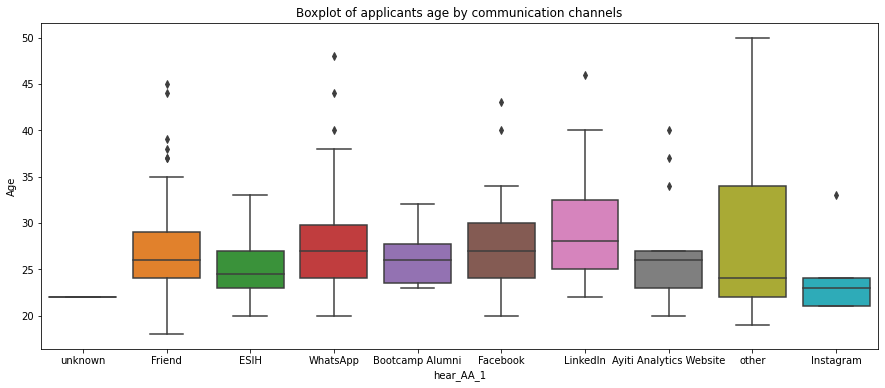

In [343]:
#here your codes
plt.figure(figsize=(15,6))
sns.boxplot(data=final_tab,x="hear_AA_1",y="Age")
plt.title('Boxplot of applicants age by communication channels')

### 7 .Is there a significant age difference between these groups

In [344]:
Facebook_list_age = final_tab[final_tab['hear_AA_1'] == 'Facebook']['Age'].values
Unknown_list_age = final_tab[final_tab['hear_AA_1'] == 'unknown']['Age'].values
Friend_list_age = final_tab[final_tab['hear_AA_1'] == 'Friend']['Age'].values
ESIH_list_age = final_tab[final_tab['hear_AA_1'] == 'ESIH']['Age'].values
WhatsApp_list_age = final_tab[final_tab['hear_AA_1'] == 'WhatsApp']['Age'].values
Bootcamp_Alumni_list_age = final_tab[final_tab['hear_AA_1'] == 'Bootcamp Alumni']['Age'].values
LinkedIn_list_age = final_tab[final_tab['hear_AA_1'] == 'LinkedIn']['Age'].values
Ayiti_Analytics_Website_list_age = final_tab[final_tab['hear_AA_1'] == 'Ayiti Analytics Website']['Age'].values
other_list_age = final_tab[final_tab['hear_AA_1'] == 'other']['Age'].values
Instagram_list_age = final_tab[final_tab['hear_AA_1'] == 'Instagram']['Age'].values




In [383]:
#here your codes
# Ho : There is no significant age difference between these groups
# h1 : There is a  significant age difference between the mean of these groups

stat, p = f_oneway(Facebook_list_age, Unknown_list_age, Friend_list_age, ESIH_list_age, WhatsApp_list_age, Bootcamp_Alumni_list_age, LinkedIn_list_age, Ayiti_Analytics_Website_list_age, other_list_age, Instagram_list_age)
print(p)
if p < 0.05:
 print("Hypothesis Rejected : There is a  significant age difference between the mean of these groups")
else:
 print("Hypothesis Accepted :There is no significant age difference between these groups ")


0.3067856416905688
Hypothesis Accepted :There is no significant age difference between these groups 


### 8.Plan a BA strategy for each communication channel regarding the age group
* Do content marketing

 Content marketing is a marketing program that centers on creating, publishing, and distributing content for your target audience -- usually online -- the goal of which is to attract new customers.


  The application process for the bootcamp is 100% online. The announcements were made on the social networks of Ayiti Analytics. 56.4% of the applicants say they heard about AA via social networks and 26.8% of the applicants hear about AA from their friends who might also have heard about it on social media, but we don't have enough data to confirm this. AA has the team and the technology, the next step is to create more content that can attract applicants like a blog post, videos, infographics,newsletters. And also use email marketing to remain in touch with subscribers 
 



### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

#### Displaying the proportion of male and female in the dataset

In [347]:
res =final_tab.gender.value_counts(normalize=True).to_frame()
display(res)

,gender
male,0.812
female,0.188


#### Displaying the probability of being one of the genders and being in one of the communications channels

In [348]:
#here your codes
gender_table = pd.pivot_table(final_tab,'Age',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)

my_pivot['Probabilty of being female and being in one of the  communications channels'] =gender_table[('count','female')]/final_tab.shape[0]
my_pivot['Probabilty of being male and being in one of the  communications channels'] = gender_table[('count','male')]/final_tab.shape[0]
my_pivot=my_pivot.iloc[:,[2,3]]
display(my_pivot)



,Probabilty of being female and being in one of the communications channels,Probabilty of being male and being in one of the communications channels
gender,,
hear_AA_1,,
Friend,0.044,0.224
WhatsApp,0.036,0.228
Bootcamp Alumni,0.032,0.024
Facebook,0.024,0.136
ESIH,0.020,0.052
Ayiti Analytics Website,0.016,0.044
other,0.008,0.028
Instagram,0.004,0.016


In [349]:
my_pivot['female'] =my_pivot['Probabilty of being female and being in one of the  communications channels']/ res.loc["female","gender"]
my_pivot.loc[:,['female']]

,female
gender,
hear_AA_1,
Friend,0.234043
WhatsApp,0.191489
Bootcamp Alumni,0.170213
Facebook,0.127660
ESIH,0.106383
Ayiti Analytics Website,0.085106
other,0.042553
Instagram,0.021277


### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [350]:
#here your codes
my_pivot['male'] =my_pivot['Probabilty of being male and being in one of the  communications channels']/ res.loc["male","gender"]
my_pivot

,Probabilty of being female and being in one of the communications channels,Probabilty of being male and being in one of the communications channels,female,male
gender,,,,
hear_AA_1,,,,
Friend,0.044,0.224,0.234043,0.275862
WhatsApp,0.036,0.228,0.191489,0.280788
Bootcamp Alumni,0.032,0.024,0.170213,0.029557
Facebook,0.024,0.136,0.127660,0.167488
ESIH,0.020,0.052,0.106383,0.064039
Ayiti Analytics Website,0.016,0.044,0.085106,0.054187
other,0.008,0.028,0.042553,0.034483
Instagram,0.004,0.016,0.021277,0.019704


### 11. Deduce the probability of being a woman knowing each communication channel

In [351]:
#here your codes
communication_table = pd.pivot_table(final_tab,'Age',index='hear_AA_1',columns='gender',aggfunc = ['count'],fill_value=0,margins = True)
communication_table= communication_table.iloc[:-1,-1].to_frame()
communication_table[('count','All')] = communication_table[('count','All')]/final_tab.shape[0]
#Using Bayes Theorem to deduce the probabilty
communication_table['Probability of being in each channel of communication knowing your are a woman']= my_pivot.loc[:,['female']]
communication_table['Probability of being in each channel of communication knowing your are a man']= my_pivot.loc[:,['male']]
communication_table['Probability of being a female knowing each communication channels']= (communication_table['Probability of being in each channel of communication knowing your are a woman'] * (0.188))/communication_table[('count','All')]
communication_table['Probability of being a male knowing each communication channels']= (communication_table['Probability of being in each channel of communication knowing your are a man'] * (0.188))/communication_table[('count','All')]
communication_table.iloc[:,3]

hear_AA_1
Ayiti Analytics Website    0.266667
Bootcamp Alumni            0.571429
ESIH                       0.277778
Facebook                   0.150000
Friend                     0.164179
Instagram                  0.200000
LinkedIn                   0.066667
WhatsApp                   0.136364
other                      0.222222
unknown                    0.000000
Name: (Probability of being a female knowing each communication channels, ), dtype: float64

### 12. Deduce the probability of being a man knowing each communication channel

In [352]:
#here your codes
communication_table.iloc[:,4]


hear_AA_1
Ayiti Analytics Website    0.169787
Bootcamp Alumni            0.099226
ESIH                       0.167214
Facebook                   0.196798
Friend                     0.193515
Instagram                  0.185222
LinkedIn                   0.216092
WhatsApp                   0.199955
other                      0.180077
unknown                    0.231527
Name: (Probability of being a male knowing each communication channels, ), dtype: float64

### 13 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


p value: 0.5496916447443122
ACCEPT NULL HYPOTHESIS : The variables are independent


<Figure size 360x1080 with 0 Axes>

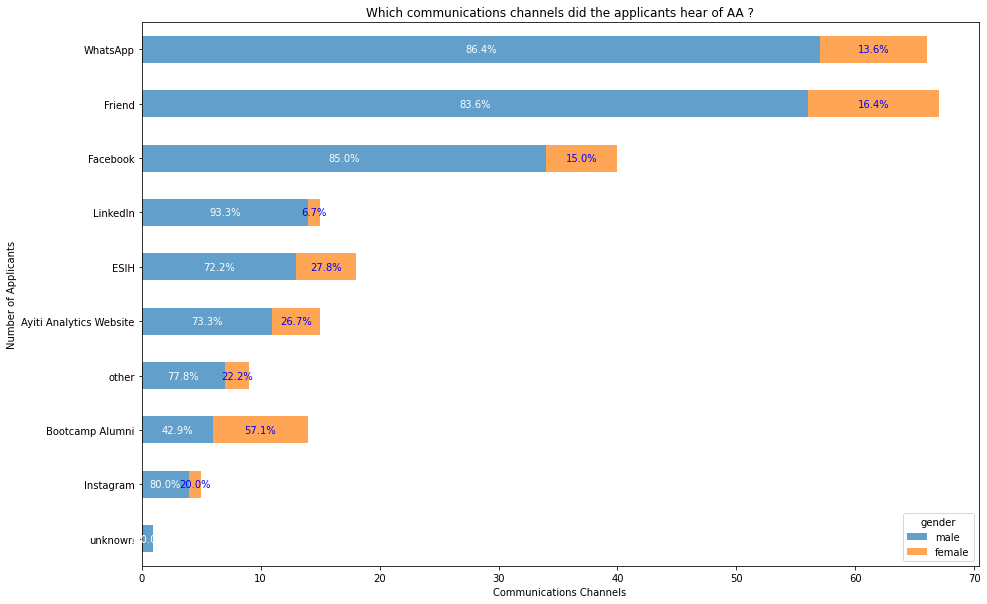

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


In [353]:
#here
def my_chisqure_test(data=final_tab,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):
  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values="Age",aggfunc="count",fill_value=0,margins = True)
  display(result1)
  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else: 
    print('ACCEPT NULL HYPOTHESIS : The variables are independent') 
  # Force the aspect ratio of the blocks to be equal using "square" parameter
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(result1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    values = result1.iloc[:-1,:].sort_values(by =('male'),ascending=True)
    ax =values.sort_values(by =('male'),ascending=True)[[('male'),('female')]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
    ylab = ax.set_ylabel('Number of Applicants')
    xlab = ax.set_xlabel('Communications Channels')
    title = ax.set_title('Which communications channels did the applicants hear of AA ?')

    index =0
    for male, female ,total in zip(values[('male')],values[('female')], values[('All')]):
      if male != total and  female != total  :
        ax.text(male/2 ,
                index,
                str(np.round((male/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
                )
        ax.text(male + female/2 ,
              index,
              str(np.round((female/total)*100,1)) + "%",
              fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
            )
      elif female == total:
        ax.text(female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )
      else:
        ax.text(male/2 ,
            index,
            str(np.round((male/total)*100,1)) + "%",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )       
   
    
      index+=1
  plt.show()
  return result1
my_chisqure_test(final_tab,columns=['hear_AA_1','gender'],significance_level=0.05,figsize=(5,15),heatmap=False) 

### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

p value: 2.7040922010696464e-14
There is not independecy between the variables :Reject NULL HYPOTHESIS


<Figure size 360x1080 with 0 Axes>

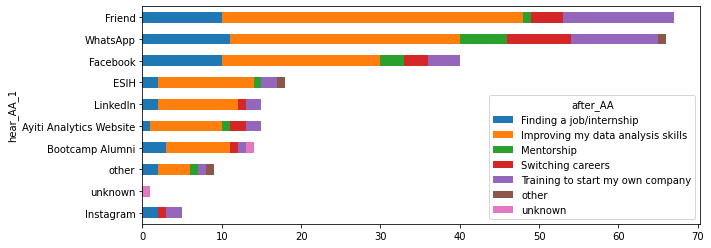

after_AA,Finding a job/internship,Improving my data analysis skills,Mentorship,Switching careers,Training to start my own company,other,unknown
hear_AA_1,,,,,,,
Ayiti Analytics Website,1,9,1,2,2,0,0
Bootcamp Alumni,3,8,0,1,1,0,1
ESIH,2,12,1,0,2,1,0
Facebook,10,20,3,3,4,0,0
Friend,10,38,1,4,14,0,0
Instagram,2,0,0,1,2,0,0
LinkedIn,2,10,0,1,2,0,0
WhatsApp,11,29,6,8,11,1,0
other,2,4,1,0,1,1,0


In [382]:
# here your codes
def my_chisqure_test(data=final_tab,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):
  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values="Age",aggfunc="count",fill_value=0)
  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('There is not independecy between the variables :Reject NULL HYPOTHESIS') 
  else: 
    print('There is independency ACCEPT NULL HYPOTHESIS') 
  # Force the aspect ratio of the blocks to be equal using "square" parameter
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(result1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    ax =result1.sort_values(by='Improving my data analysis skills').plot(kind="barh",stacked=True,figsize=(10,4))
 
  plt.show()
  return result1
my_chisqure_test(final_tab,columns=['hear_AA_1','after_AA'],significance_level=0.05,figsize=(5,15),heatmap=False)  

### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

Find the right approach for each gender :

 In order to determine the ideal target group, the interest of the target should be taken into account with the insight provided by the dataset,we can assert that there is dependency between the two variables of Bootcamp interest and communication channels .But it is also important to include other factors for a successful campaign. In the case of gender-specific advertising messages, it is important to avoid clichés. 

  
  This is especially advisable for gender-related campaigns, such as Women’s Day. Women are particularly well-received if the content is conveyed by emotions, people or family. We can assert it with friends and bootcamp alumni being the top communication channels by the women  In contrast, male users prefer campaigns with action and competitive situations. The campaign content should also be transferred to the visual level: clear, bright newsletters with an emotional design are appealing to female customers, while men find a rational approach with technical details and comparisons appealing.Whatsapp and friend are the top communicationg channels for men


### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [370]:
result12  = pd.pivot_table(data=final_tab,columns='after_AA',index=['Paid','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
result12 = result12 /final_tab[final_tab['Paid'] == 'Yes'].shape[0]
result12

after_AA                             Finding a job/internship  \
Paid hear_AA_1               gender                             
Yes  Ayiti Analytics Website male                    0.015385   
     Bootcamp Alumni         female                  0.015385   
                             male                    0.000000   
     ESIH                    male                    0.015385   
     Facebook                female                  0.000000   
                             male                    0.015385   
     Friend                  female                  0.015385   
                             male                    0.030769   
     Instagram               male                    0.015385   
     LinkedIn                female                  0.000000   
                             male                    0.015385   
     WhatsApp                female                  0.015385   
                             male                    0.046154   
     other                   female                  0.000000   
                             male                    0.000000   
no   Ayiti Analytics Website female                  0.000000   
                             male                    0.000000   
     Bootcamp Alumni         female                  0.030769   
                             male                    0.000000   
     ESIH                    female                  0.000000   
                             male                    0.015385   
     Facebook                female                  0.030769   
                             male                    0.107692   
     Friend                  female                  0.046154   
                             male                    0.061538   
     Instagram               female                  0.000000   
                             male                    0.015385   
     LinkedIn                male                    0.015385   
     WhatsApp                female                  0.000000   
                             male                    0.107692   
     other                   female                  0.000000   
                             male                    0.030769   
     unknown                 male                    0.000000   
All                                                  0.661538   

after_AA                             Improving my data analysis skills  \
Paid hear_AA_1               gender                                      
Yes  Ayiti Analytics Website male                             0.015385   
     Bootcamp Alumni         female                           0.015385   
                             male                             0.076923   
     ESIH                    male                             0.030769   
     Facebook                female                           0.030769   
                             male                             0.076923   
     Friend                  female                           0.030769   
                             male                             0.215385   
     Instagram               male                             0.000000   
     LinkedIn                female                           0.015385   
                             male                             0.015385   
     WhatsApp                female                           0.046154   
                             male                             0.046154   
     other                   female                           0.000000   
                             male                             0.015385   
no   Ayiti Analytics Website female                           0.030769   
                             male                             0.092308   
     Bootcamp Alumni         female                           0.030769   
                             male                             0.000000   
     ESIH                    female                           0.046154   
                             ma

In [375]:
result123  = pd.pivot_table(data=final_tab[final_tab['Paid'] == 'no'],columns='after_AA',index=['Paid','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
result123 = result123 /final_tab[final_tab['Paid'] == 'no'].shape[0]
result123

after_AA                             Finding a job/internship  \
Paid hear_AA_1               gender                             
no   Ayiti Analytics Website female                  0.000000   
                             male                    0.000000   
     Bootcamp Alumni         female                  0.010811   
                             male                    0.000000   
     ESIH                    female                  0.000000   
                             male                    0.005405   
     Facebook                female                  0.010811   
                             male                    0.037838   
     Friend                  female                  0.016216   
                             male                    0.021622   
     Instagram               female                  0.000000   
                             male                    0.005405   
     LinkedIn                male                    0.005405   
     WhatsApp                female                  0.000000   
                             male                    0.037838   
     other                   female                  0.000000   
                             male                    0.010811   
     unknown                 male                    0.000000   
All                                                  0.162162   

after_AA                             Improving my data analysis skills  \
Paid hear_AA_1               gender                                      
no   Ayiti Analytics Website female                           0.010811   
                             male                             0.032432   
     Bootcamp Alumni         female                           0.010811   
                             male                             0.000000   
     ESIH                    female                           0.016216   
                             male                             0.037838   
     Facebook                female                           0.000000   
                             male                             0.070270   
     Friend                  female                           0.021622   
                             male                             0.097297   
     Instagram               female                           0.000000   
                             male                             0.000000   
     LinkedIn                male                             0.043243   
     WhatsApp                female                           0.016216   
                             male                             0.108108   
     other                   female                           0.005405   
                             male                             0.010811   
     unknown                 male                             0.000000   
All                                                           0.481081   

after_AA                             Mentorship  Switching careers  \
Paid hear_AA_1               gender                                  
no   Ayiti Analytics Website female    0.000000           0.005405   
                             male      0.005405           0.005405   
     Bootcamp Alumni         female    0.000000           0.000000   
                             male      0.000000           0.000000   
     ESIH                    female    0.005405           0.000000   
                             male      0.000000           0.000000   
     Facebook                female    0.010811           0.000000   
                             male      0.005405           0.016216   
     Friend                  female    0.000000           0.000000   
                             male      0.005405           0.021622   
     Instagram               female    0.000000           0.000000   
                             male      0.000000           0.005405   
     LinkedIn                male      0.000000           0.005405   
     WhatsApp                

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [392]:
# here your codes
m = pd.pivot_table(data=final_tab,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
m=final_tab[final_tab['Paid'] == 'Yes'].shape[0]/m
g = result12*m
g = g.fillna("-")
display(g)
g.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']

after_AA                            Finding a job/internship  \
hear_AA_1               gender Paid                            
                               All                         -   
All                            NaN                         -   
Ayiti Analytics Website female no                          -   
                        male   Yes                       1.0   
                               no                        0.0   
Bootcamp Alumni         female Yes                  0.333333   
                               no                   0.666667   
                        male   Yes                         -   
                               no                          -   
ESIH                    female no                          -   
                        male   Yes                       0.5   
                               no                        0.5   
Facebook                female Yes                       0.0   
                               no                        1.0   
                        male   Yes                     0.125   
                               no                      0.875   
Friend                  female Yes                      0.25   
                               no                       0.75   
                        male   Yes                  0.333333   
                               no                   0.666667   
Instagram               female no                          -   
                        male   Yes                       0.5   
                               no                        0.5   
LinkedIn                female Yes                         -   
                        male   Yes                       0.5   
                               no                        0.5   
WhatsApp                female Yes                       1.0   
                               no                        0.0   
                        male   Yes                       0.3   
                               no                        0.7   
other                   female Yes                         -   
                               no                          -   
                        male   Yes                       0.0   
                               no                        1.0   
unknown                 male   no                          -   

after_AA                            Improving my data analysis skills  \
hear_AA_1               gender Paid                                     
                               All                                  -   
All                            NaN                                  -   
Ayiti Analytics Website female no                                 1.0   
                        male   Yes                           0.142857   
                               no                            0.857143   
Bootcamp Alumni         female Yes                           0.333333   
                               no                            0.666667   
                        male   Yes                                1.0   
                               no                                 0.0   
ESIH                    female no                                 1.0   
                        male   Yes                           0.222222   
                               no                            0.777778   
Facebook                female Yes                                1.0   
                               no                                 0.0   
                        male   Yes                           0.277778   
                               no                            0.722222   
Friend                  female Yes                           0.333333   
                               no                            0.666667   
                        male   Yes                             0.4375   
                               no                              0.5625   
Instagram               f

Paid
Yes    0.4375
no     0.5625
Name: Improving my data analysis skills, dtype: object

In [393]:
n = pd.pivot_table(data=final_tab,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
n=final_tab[final_tab['Paid'] == 'no'].shape[0]/n
h = result123*n
display(h.fillna("-"))
h.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']

after_AA                            Finding a job/internship  \
hear_AA_1               gender Paid                            
                               All                         -   
All                            NaN                         -   
Ayiti Analytics Website female no                          -   
                        male   no                        0.0   
Bootcamp Alumni         female no                   0.666667   
                        male   no                          -   
ESIH                    female no                          -   
                        male   no                        0.5   
Facebook                female no                        1.0   
                        male   no                      0.875   
Friend                  female no                       0.75   
                        male   no                   0.666667   
Instagram               female no                          -   
                        male   no                        0.5   
LinkedIn                female NaN                         -   
                        male   no                        0.5   
WhatsApp                female no                        0.0   
                        male   no                        0.7   
other                   female no                          -   
                        male   no                        1.0   
unknown                 male   no                          -   

after_AA                            Improving my data analysis skills  \
hear_AA_1               gender Paid                                     
                               All                                  -   
All                            NaN                                  -   
Ayiti Analytics Website female no                                 1.0   
                        male   no                            0.857143   
Bootcamp Alumni         female no                            0.666667   
                        male   no                                 0.0   
ESIH                    female no                                 1.0   
                        male   no                            0.777778   
Facebook                female no                                 0.0   
                        male   no                            0.722222   
Friend                  female no                            0.666667   
                        male   no                              0.5625   
Instagram               female no                                   -   
                        male   no                                   -   
LinkedIn                female NaN                                  -   
                        male   no                            0.888889   
WhatsApp                female no                                 0.5   
                        male   no                            0.869565   
other                   female no                                 1.0   
                        male   no                            0.666667   
unknown                 male   no                                   -   

after_AA                            Mentorship Switching careers  \
hear_AA_1               gender Paid                                
                               All           -                 -   
All                            NaN           -                 -   
Ayiti Analytics Website female no            -               1.0   
                        male   no          1.0               1.0   
Bootcamp Alumni         female no            -               0.0   
                        male   no            -                 -   
ESIH                    female no          1.0                 -   
                        male   no            -                 -   
Facebook                female no          1.0                 -   
                        male   no          1.0               1.0   
Friend                  female 

Paid
no    0.5625
Name: Improving my data analysis skills, dtype: float64

### Based on these findings, propose strategies to increase our sales?


* 1 - Recognize the customer's problems or needs 
  It all starts with understanding your customers.With the insights obtained,we can see where the bootcamp interest can play a big part with attracting customers. Knowing that the bootcamp could upscale their skills or open doors on the professional world.

* 2- People Buy Benefits 

  People don’t buy products, they buy the results that product will give. AA have to start the process of identifying their ideal customer by making a list of all of the benefits that their customers will enjoy by using their products or services.After participating in the bootcamp, the applicants want to Improving their data skills , Finding an internship or start their own company after learning all the job-ready skills 



* 3- Develop Your Competitive Advantage
  You define your competitive advantage, the reason for buying your products or services, in terms of the benefits, results or outcomes that your customer will enjoy from purchasing your product or service that they would not fully enjoy from purchasing the product or service of your competitor. AA is for now the only company providing this services in Haiti, Extending their market should be the next move for them to be able to reach out more young people that loves tech in haiti.(refers to first Python Project)

Focus on the benefits of what makes your product better than others.
